# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
####FUNCTIONS
def load_Y_data(path ,Y_file) : 
    X, Y, Y_err = np.loadtxt(path + Y_file, usecols = (0,2,3) ,unpack=True)
    return X, Y, Y_err

def plot_Y_data(ax, x, y, err, observable, N) :
    ax.errorbar(x, y, yerr=err)#, 
    ax.set_xlabel('i block step')
    ax.set_ylabel(f"{observable}")
    ax.set_title(f"{phase} phase, N particles = {N}")
    ax.grid(True)

def load_eq_data(path ,Y_file) : 
    X, Y = np.loadtxt(path + Y_file, usecols = (0,1) ,unpack=True)
    return X, Y
   
    
def plot_eq_data(ax, x, y, observable, N) :
    ax.plot(x, y)
    ax.set_xlabel('i step')
    ax.set_ylabel(f"{observable}")
    ax.set_title(f"{phase} phase, N particles = {N}")
    ax.grid(True)

In [3]:
data_path="DATA/"

# Liquid phase

In [4]:
phase="liquid"

In [5]:
equil_path="DATA/" + phase + "_equilibration/" #istantaneus values obtained during equilibration
full_path="DATA/" + phase + "_averages/" #block averages result after equilibration

In [6]:
filenames = np.genfromtxt(phase + "_filenames.txt", dtype='str')# load filenames

Nobs=len(filenames) #Number of observable
Obs=["U/N", "K/N", "T", "E/N", "P"] 
N=108 #number of particles

#setting the vectors in which data will be loaded for all observables
Nblocks_vec= np.empty(Nobs, dtype=object) #vector with i bloxk step index
Y_vec= np.empty(Nobs, dtype=object) #value of the observable per block
Y_err_vec= np.empty(Nobs, dtype=object) #err of the observable per block


### Equilibration

To check the equilibration of the system we want to use the observable's instantaneous values. We use the same program, but choosing $\text{nstep}=1$ and $\text{nblk}=\text{number of istantaneous values}$.



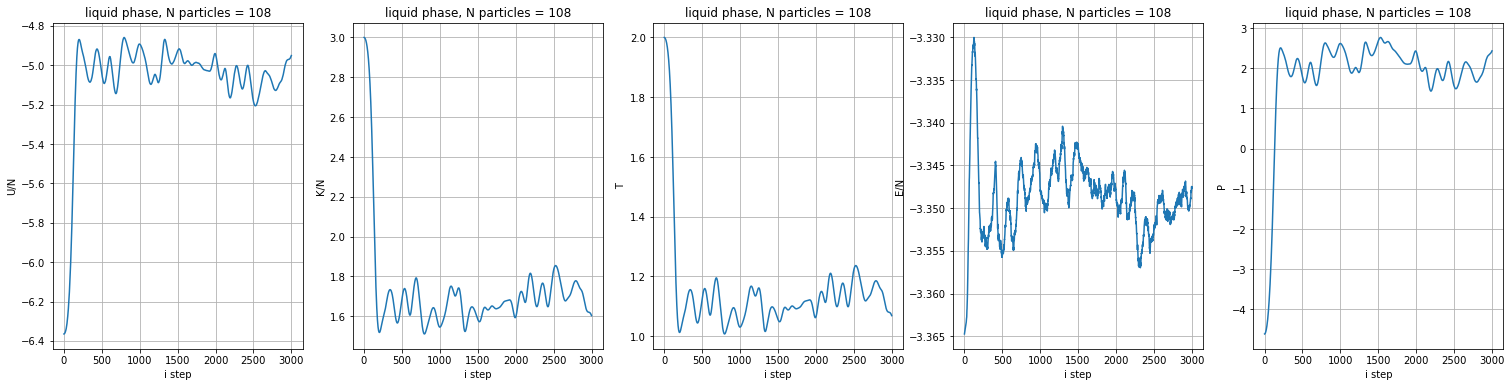

In [7]:
#equilibration plots
fig, axes = plt.subplots(1, Nobs, figsize=(26, 6))

for ax, i in zip(axes, range(Nobs)) :
    Nblocks_vec[i], Y_vec[i] = load_eq_data(equil_path, filenames[i])
    plot_eq_data(ax, Nblocks_vec[i], Y_vec[i], Obs[i], N)

observations:

- We can observe that the kinetic energy per particle and the temperature have the same beahviour, this is obvious as it is built in the code in which we use the equipartition theorem to calculate the temperature.

- Energy per particle varies at the $10^{-3}$ order, so is overall constant. As we hope it should be since the system conserve its energy. So the algorithm must respect this constraint for a time sufficent to our interests.  

- If we want to simulate the system at a certain temperature $T$, we need to start with another temperature $\tilde{T}$ to sample the intial velocities, such that after an equilibration time the system will reach temperature $T$. This happens for the following reason. Basically we have a fcc initial condition for positions, which is a low potential energy configuration. Choosing the initial spatial configuration this way, gives us a initial microstate which is most probably not in the phase space macro region which corresponds to the thermodynamic equilibrium. (we can immagine the energy hypersurface as partitioned in macro regions corresponding to macro states, one of this region takes most of the surface and corresponds to the equilibrium macrostate, in the approximaiton of thermodynamic limit). Basically the intial positions correspond to a highly unprobable state for a liquid phase. We can expect that the termal energy present in the system will make the particles move away from this fcc conifguration. The particle will try to clusterize more in separate groups. So the potential energy will decrease in module, moving away from the fcc configuration. Yet total energy is conserved, so the kinetic energy must diminish and so, due to the equipartition theorem, even the temperature will diminish. Hence we have to start at a higher $\tilde{T}$. 



### Observables for the system after equilibration

Here are the plots for the observables' runnign averagesaverages, obtained restarting the simulation with initial microstate given by the last step of the equilibration.

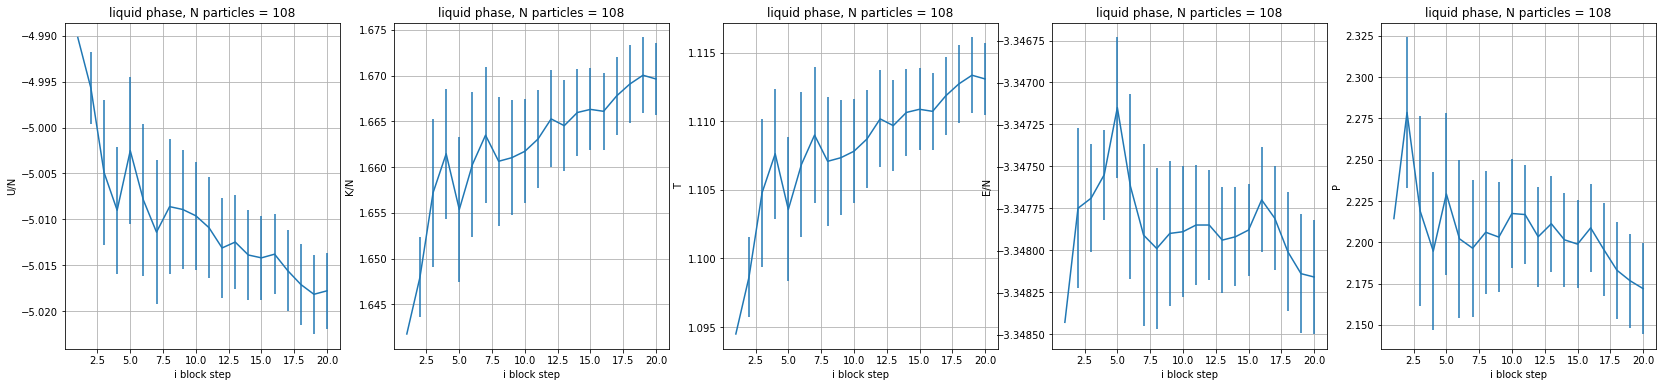

In [8]:
#data after the equilibration period is reached
fig, axes = plt.subplots(1, Nobs, figsize=(28.5, 6))

for ax, i in zip(axes, range(Nobs)) :
    Nblocks_vec[i], Y_vec[i], Y_err_vec[i] = load_Y_data(full_path ,filenames[i])
    plot_Y_data(ax, Nblocks_vec[i], Y_vec[i], Y_err_vec[i], Obs[i], N)


What we are doing here is calculating the time averages for our observables. In fact with the Verlet algorithm we are following the trajectory in phase space characterised by the initial configuration. Evaluating the observables at fixed points of the trajectory we get an estimate for time averages of this kind, $\langle O \rangle_{time}=\frac{1}{N}\sum_i^N O(S_{t_i}(\vec{p_0},\vec{q_0}))$, where $S$ is the evolution operator, $(\vec{p_0},\vec{q_0})$ the intial conifuguration and $O$ the observable function defined on phase space.  

The interesting part would be to check that, if we make sure the evolution time is long enough (infinte respect the characeristic time of the microscopic dynamics), the time averages and the ensemble averages are the same. We will do this in another lecture, where we will use the Metropolis algorithm to sample the canonical ensemble pdf and obtain our enesemble average estimates to make a confrontation. The equivalence of time averages and ensemble averages is a non trivial fact that in most cases is not demonstrated explicitely, in this case we could check if it holds with our simulations.  

On a second note there is a subtle point to stress about the possibility of getting estimates of the time averages.
Due to finite percision errors, the trajectory we follow numerically will diverge from the true dynamical trajectory associated to the inital microstate. So to say that we are getting estimates for the time averages we should be sure that this perturbations don't modify the trajectory for a time sufficent for our simulation. Anyway if this doesn't hold and the trajectory diverge, we are still sampling the constant energy hypersurface in phase space. So what we could obtain are Microcanical ensemble averages, to confront later with the Canonical predictions.


# Solid phase

In [9]:
phase="solid"

In [10]:
equil_path="DATA/" + phase + "_equilibration/" #istantaneus values obtained during equilibration
full_path="DATA/" + phase + "_averages/" #block averages result after equilibration

In [11]:
filenames = np.genfromtxt(phase + "_filenames.txt",dtype='str')

#Number of observable
Nobs=len(filenames)
Obs=["U/N", "K/N", "T", "E/N", "P"] #c'è un problema, se uso {} credo sia un set object e non va bene
N=108

#setting the vectors in which data will be loaded for all observables
Nblocks_vec= np.empty(Nobs, dtype=object)
Y_vec= np.empty(Nobs, dtype=object) 
Y_err_vec= np.empty(Nobs, dtype=object)


### Equilibration

The solid equilibrates mostly like the liquid. Starting from a fcc initial configuration could help the equilibration in this case. In fact the initial spatial microstate in this case tends to be keeped, as we are simulating a solid phase. Plus being at lower temperatures the interactions are even more dominant, this can help the system to reach equilibrium.

Aside from this points , the phenomenology during the equilibration process seems to be like the one for the liquid phase. The same variation of internal energy we found in the liquid phase is present here. Again, I guess as a consequnce of the thermal energy present in the system. Since T is lower but still different from zero.

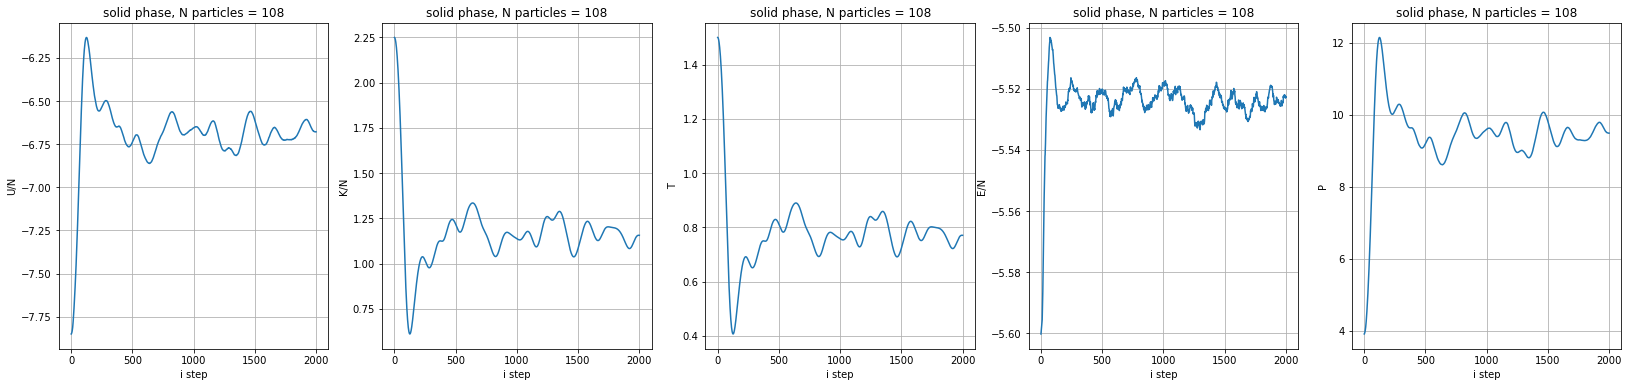

In [12]:
fig, axes = plt.subplots(1, Nobs, figsize=(28, 6))

for ax, i in zip(axes, range(Nobs)) :
    Nblocks_vec[i], Y_vec[i] = load_eq_data(equil_path, filenames[i])
    plot_eq_data(ax, Nblocks_vec[i], Y_vec[i], Obs[i], N)

### Observables for the system after equilibration


Here are the running averages for our observables, obtained restarting from the final configuration of the equilibration run.

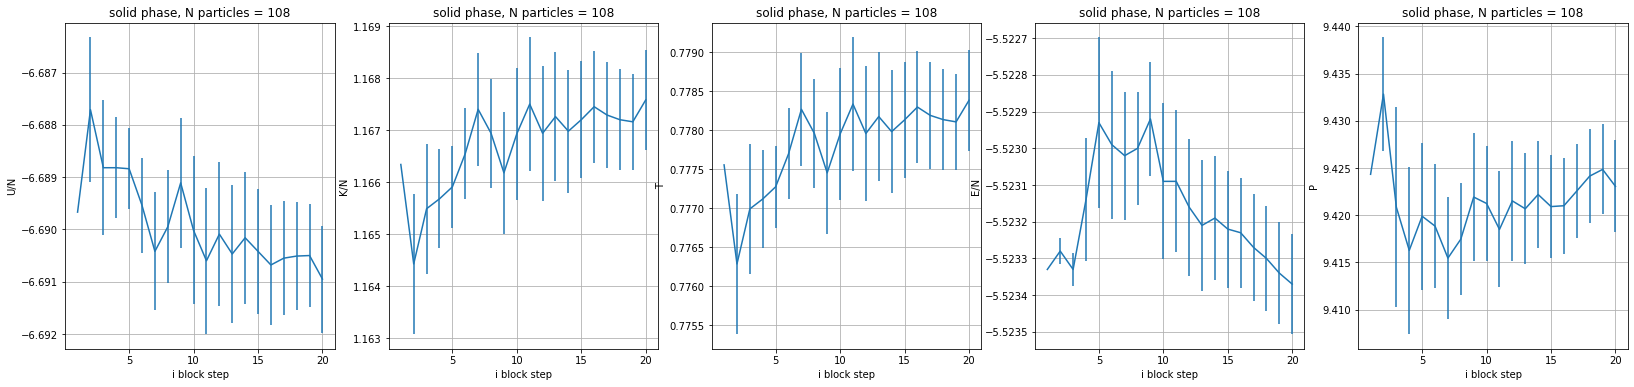

In [13]:
fig, axes = plt.subplots(1, Nobs, figsize=(28, 6))

for ax, i in zip(axes, range(Nobs)) :
    Nblocks_vec[i], Y_vec[i], Y_err_vec[i] = load_Y_data(full_path, filenames[i])
    plot_Y_data(ax, Nblocks_vec[i], Y_vec[i], Y_err_vec[i], Obs[i], N)

The values of our observales' estimates seems to confirm what we would expect to find for the solid phase.
A greater potential energy per particle, a lower kinetic energy per particle and higher pressure respect the liquid phase.

# Gas phase

In [14]:
phase="gas"

In [15]:
equil_path="DATA/" + phase + "_equilibration/" #istantaneus values obtained during equilibration
full_path="DATA/" + phase + "_averages/" #block averages result after equilibration


In [16]:
filenames = np.genfromtxt(phase + "_filenames.txt",dtype='str')

#Number of observable
Nobs=len(filenames)
Obs=["U/N", "K/N", "T", "E/N", "P"] #c'è un problema se uso {} credo sia un set object e non va bene
N=108

#setting the vectors in which data will be loaded for all observables
Nblocks_vec= np.empty(Nobs, dtype=object)
Y_vec= np.empty(Nobs, dtype=object) 
Y_err_vec= np.empty(Nobs, dtype=object)

### Equilibration

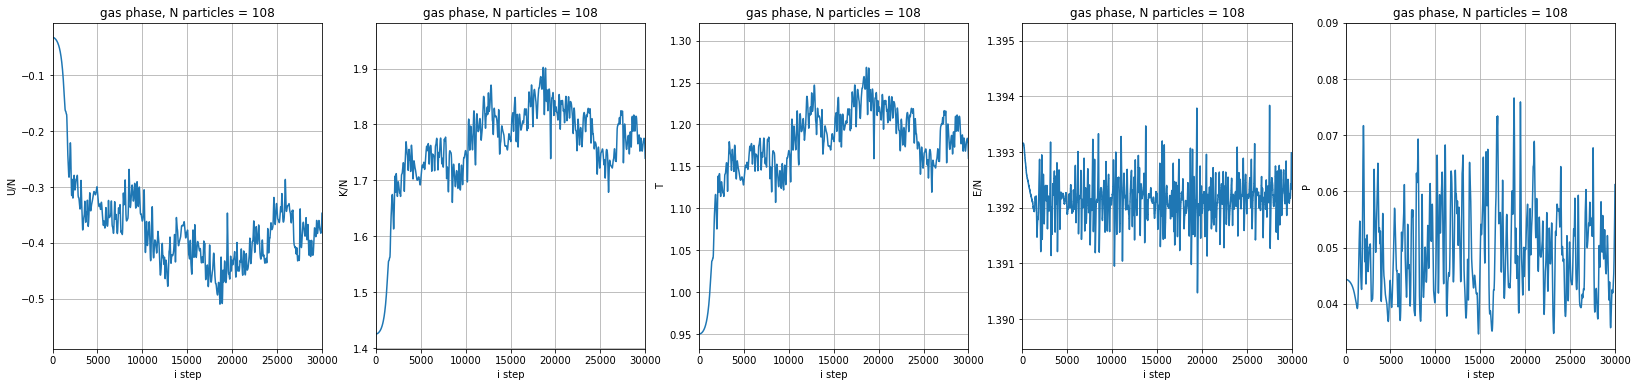

In [17]:
fig, axes = plt.subplots(1, Nobs, figsize=(28, 6))

for ax, i in zip(axes, range(Nobs)) :
    Nblocks_vec[i], Y_vec[i] = load_eq_data(equil_path, filenames[i])
    plot_eq_data(ax, Nblocks_vec[i], Y_vec[i], Obs[i], N)
    ax.set_xlim([0, 30000])

As we can see equilibration is harder to reach in the gas case. The main reason to me is that we are considering a dilute gas. The low density make the phenomenology quite similar to a weakly interacting gas, even though the potential is always a Lennard-Jones. In fact the low density makes the mean free path of a diluted gas particles quite large. So the particles will travel in straight lines for long times before finally founding a particle with which they interact. Due to this effect the system needs time to reach equilibration. 

The phenomenolgy of equilibration is different too. We see the potential energy per particle decreasing, hence, for the reason already explained above, temperature will increase. This happens again because of the particular inital configuration. The dilute gas behaves similarly to a weakly interacting gas, and the fcc initial configuration is not typical. The particles will tend to move near each other with a certain degree of randomness given the fact that the gas is diluted. So the system potential energy per particle will sligthly increase in module, however it is still a small part of the total energy, which is made most of kinetic energy. 

### Observables for the system after equilibration

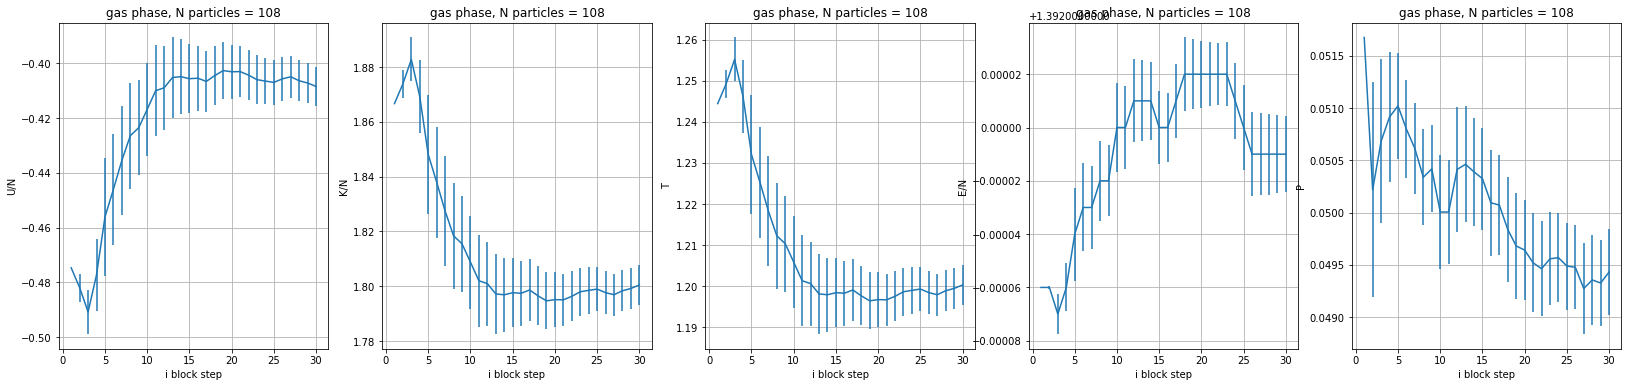

In [18]:
fig, axes = plt.subplots(1, Nobs, figsize=(28, 6))

for ax, i in zip(axes, range(Nobs)) :
    Nblocks_vec[i], Y_vec[i], Y_err_vec[i] = load_Y_data(full_path, filenames[i])
    plot_Y_data(ax, Nblocks_vec[i], Y_vec[i], Y_err_vec[i], Obs[i], N)

Again we find what we should expect from the dilute gas obersvables. The most of the total energy is kinetic energy, while pressure is low. 